# Lista 7

# Questão 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

170498071/170498071 [==============================] - 18s 0us/step


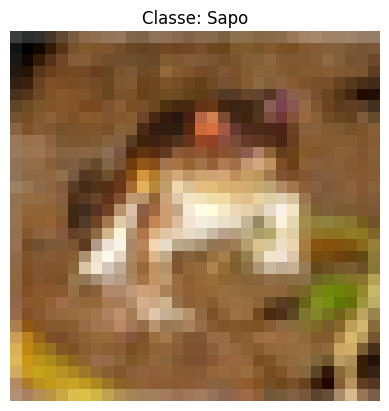

In [2]:


# Load CIFAR-10 dataset (Não usei 5/6 para o treino porque o proprio codigo do Moacyr utilizava isso)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define classes
classes = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

indice_imagem_escolhida = 0

image = x_train[indice_imagem_escolhida]
label = y_train[indice_imagem_escolhida]

# Display the image and label
plt.imshow(image)
plt.axis('off')
plt.title('Classe: ' + classes[label[0]])
plt.show()


# Questão 2

In [3]:
# values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Questão 3

In [4]:


# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 11s 8ms/step - loss: 1.3802 - accuracy: 0.5048 - val_loss: 1.0843 - val_accuracy: 0.6152
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.9350 - accuracy: 0.6710 - val_loss: 0.9005 - val_accuracy: 0.6822
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.7445 - accuracy: 0.7396 - val_loss: 0.7872 - val_accuracy: 0.7218
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.5962 - accuracy: 0.7903 - val_loss: 0.7627 - val_accuracy: 0.7322
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4694 - accuracy: 0.8368 - val_loss: 0.7499 - val_accuracy: 0.7483
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.3561 - accuracy: 0.8749 - val_loss: 0.7825 - val_accuracy: 0.7572
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 0.2536 - accuracy: 0.9097 - val_loss: 0.9960 - val_accuracy: 0.7402
Epoch

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 1.3110 - accuracy: 0.7425
Test Loss: 1.3110
Test Accuracy: 0.7425


# Questão 4

1/1 [==============================] - 0s 17ms/step
Previsões:  [[1.5056870e-02 1.1867913e-04 2.1068724e-02 3.6523867e-01 3.9180589e-01
  6.8715098e-03 4.8097294e-02 5.4792711e-04 1.5017872e-01 1.0157095e-03]]
Predicted class: 4


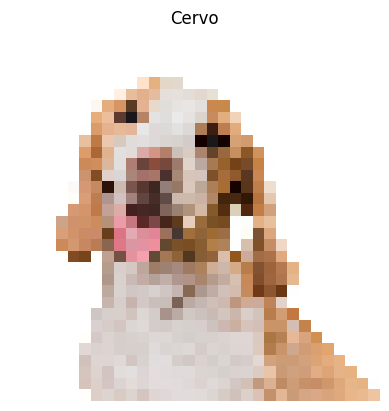

In [9]:
import matplotlib.pyplot as plt

im_nova = plt.imread("imagem_cao.png")
im_normalizado = im_nova / 255.0
nova_entrada = np.expand_dims(im_normalizado, axis=0)
previsoes = model.predict(nova_entrada)
predicted_class = np.argmax(previsoes)

print("Previsões: ", previsoes)
print(f"Predicted class: {predicted_class}")

plt.imshow(im_nova)
plt.axis('off')
plt.title(classes[predicted_class])
plt.show()


1/1 [==============================] - 0s 18ms/step
Previsões:  [[1.2870337e-02 1.2856425e-04 2.1807225e-02 3.4945345e-01 4.0346277e-01
  7.4369451e-03 4.5504991e-02 5.2349491e-04 1.5785596e-01 9.5633545e-04]]
Predicted class: 4


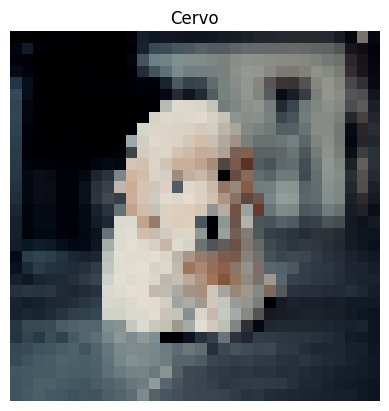

In [10]:
import matplotlib.pyplot as plt

im_nova = plt.imread("imagem_cao_2.png")
im_normalizado = im_nova / 255.0
nova_entrada = np.expand_dims(im_normalizado, axis=0)
previsoes = model.predict(nova_entrada)
predicted_class = np.argmax(previsoes)

print("Previsões: ", previsoes)
print(f"Predicted class: {predicted_class}")

plt.imshow(im_nova)
plt.axis('off')
plt.title(classes[predicted_class])
plt.show()


# Questão 5

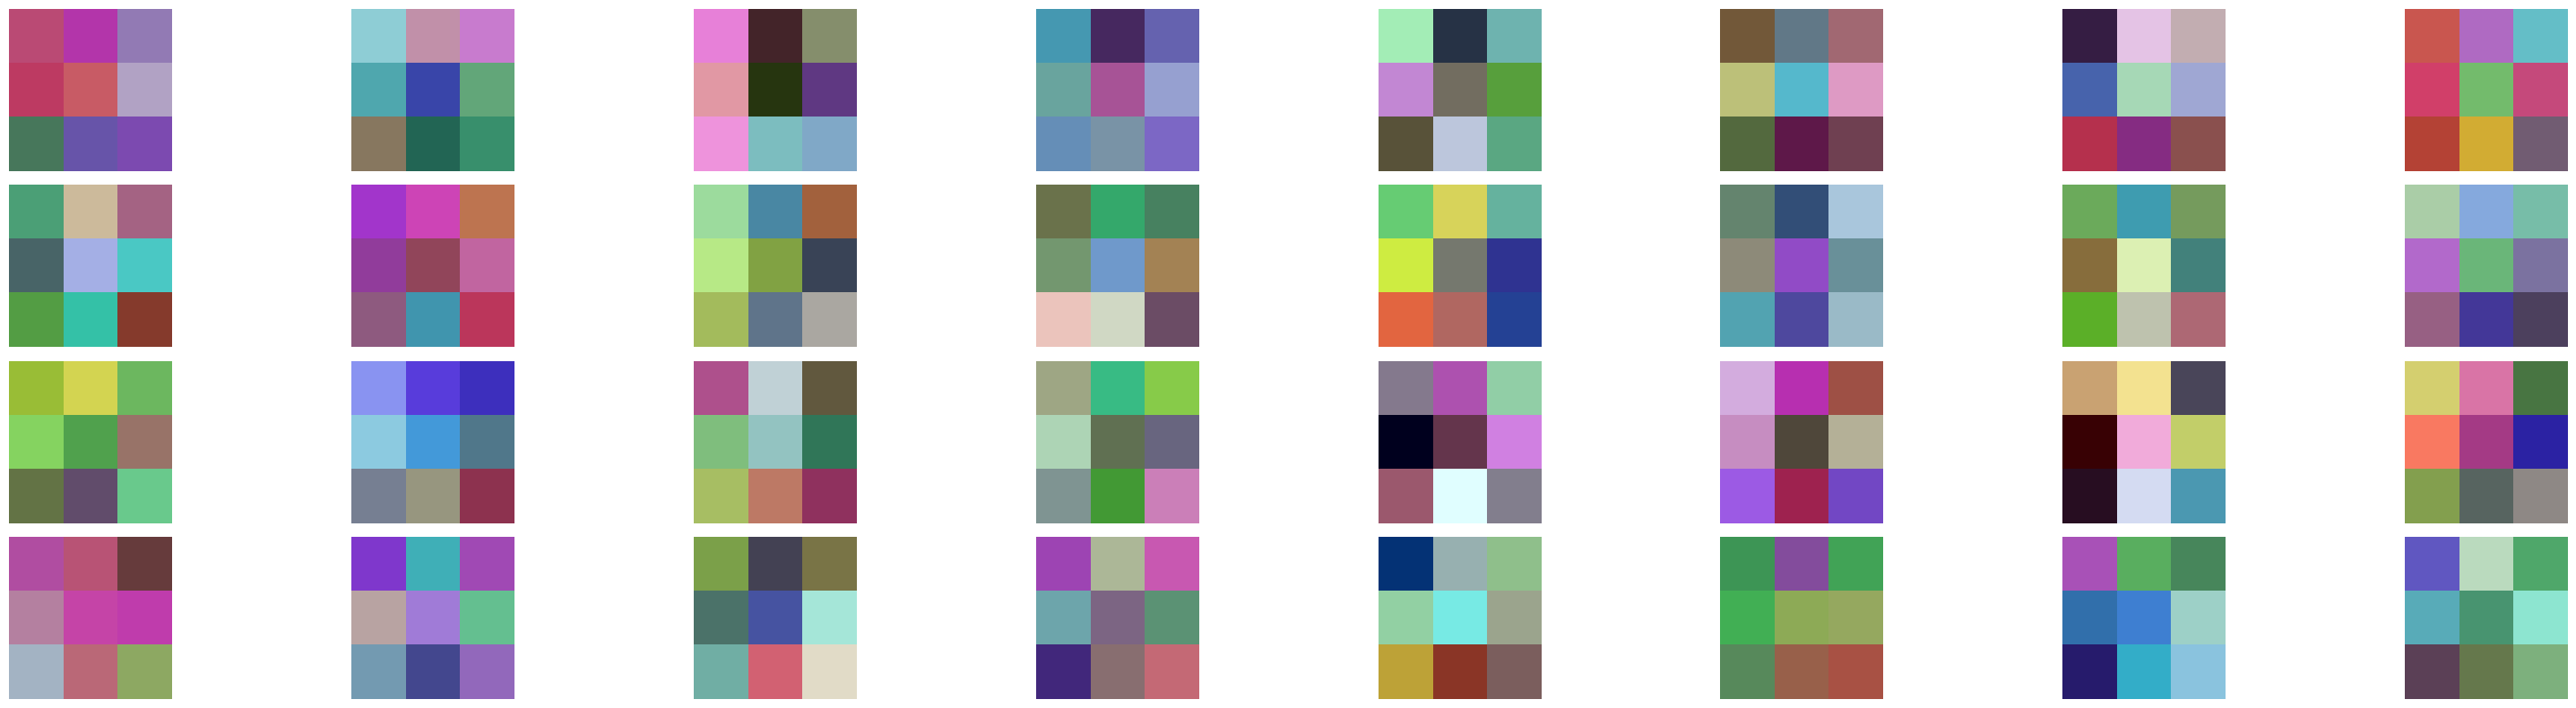

In [11]:
pesos_primeira_camada = model.layers[0].get_weights()[0]

# Normalize weights for display
pesos_normalizados = (pesos_primeira_camada - np.min(pesos_primeira_camada)) / (np.max(pesos_primeira_camada) - np.min(pesos_primeira_camada))
pesos_normalizados *= 255

num_linhas = 4
num_colunas = 8
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(32, 8))

for i in range(32):
    ax = axs[i // num_colunas, i % num_colunas]
    filtro = pesos_normalizados[:, :, :, i]
    filtro_img = filtro.astype(np.uint8)
    ax.imshow(filtro_img, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


# Questão 6

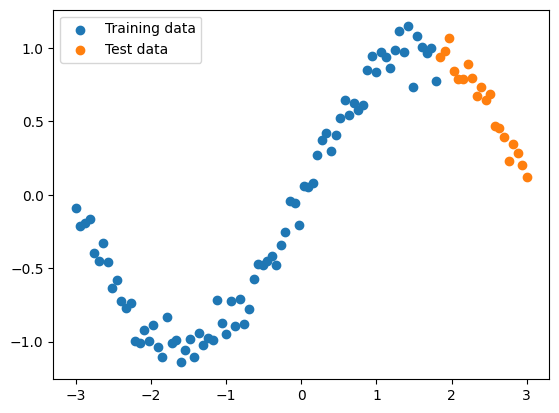

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

train_size = int(0.83 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Plot the data
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')
plt.legend()
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def train_model(hidden_layers, neurons_per_layer, X_train, y_train, X_test, y_test, epochs=100):
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(1,)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(), loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_data=(X_test, y_test))

    train_loss = history.history['loss'][-1]
    test_loss = history.history['val_loss'][-1]

    return train_loss, test_loss

hidden_layers_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_losses = []
test_losses = []

for hidden_layers in hidden_layers_list:
    train_loss, test_loss = train_model(hidden_layers, 50, X_train, y_train, X_test, y_test)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f'Hidden layers: {hidden_layers}, Train loss: {train_loss}, Test loss: {test_loss}')


Hidden layers: 1, Train loss: 0.0693574920296669, Test loss: 1.0481959581375122
Hidden layers: 2, Train loss: 0.03388036787509918, Test loss: 0.8424892425537109
Hidden layers: 3, Train loss: 0.010464983992278576, Test loss: 0.682965874671936
Hidden layers: 4, Train loss: 0.009398326277732849, Test loss: 0.6711716651916504
Hidden layers: 5, Train loss: 0.009027136489748955, Test loss: 0.591596782207489
Hidden layers: 6, Train loss: 0.008851848542690277, Test loss: 0.6108281016349792
Hidden layers: 7, Train loss: 0.007971436716616154, Test loss: 0.3921021819114685
Hidden layers: 8, Train loss: 0.009221719577908516, Test loss: 0.49209579825401306
Hidden layers: 9, Train loss: 0.008912481367588043, Test loss: 0.4859561026096344
Hidden layers: 10, Train loss: 0.00907069630920887, Test loss: 0.5571922063827515


# plot do fenômeno

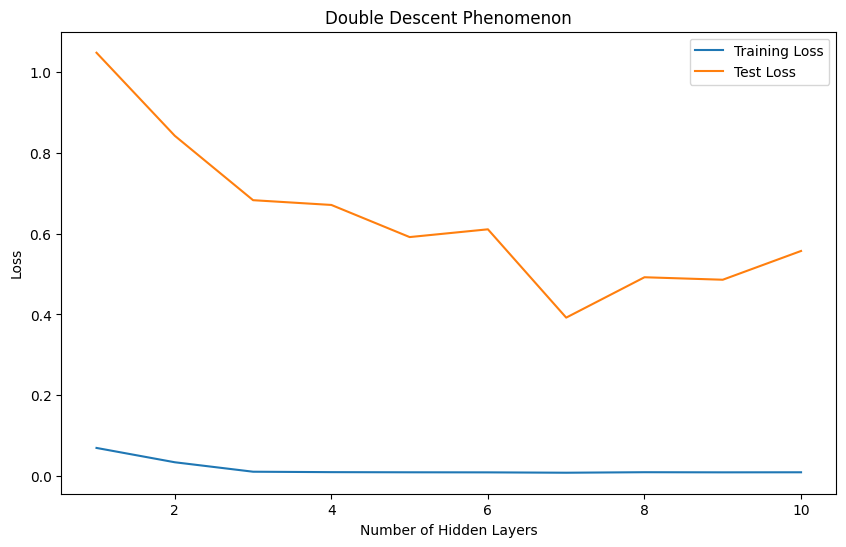

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(hidden_layers_list, train_losses, label='Training Loss')
plt.plot(hidden_layers_list, test_losses, label='Test Loss')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Loss')
plt.title('Double Descent Phenomenon')
plt.legend()
plt.show()
